# Averaged Artifact Substraction with EEG Data
## First step prepare Jupyter Notebook

In [1]:
import os, sys
from FACET.Facet import Facet

from loguru import logger

os.getcwd()
os.chdir(os.path.dirname(os.path.abspath("__file__")))

logger.remove()
logger.add(sys.stderr, level="INFO")
logger.add("Facet.log", level="DEBUG")

eegDataSet = "NiazyFMRI.edf"

f = Facet()


## Second Step import EEG Data

In [2]:
f.import_EEG(eegDataSet, artifact_to_trigger_offset=-0.005, bads=['EMG', 'ECG'])
f.get_EEG().mne_raw.crop(0,162)
f.find_triggers(r'\b1\b')
event_id={'trigger':1}
f.export_EEG(path="./export",fmt="bids", event_id=event_id)
f.import_EEG(path="./export", fmt="bids", artifact_to_trigger_offset=-0.005, bads=['EMG', 'ECG'])

f.plot_EEG(title="after import")

2024-03-27 17:08:53.742 | INFO     | FACET.Facet:import_EEG:18 - Importing EEG from NiazyFMRI.edf
2024-03-27 17:08:54.471 | INFO     | FACET.Facet:find_triggers:26 - finding triggers
2024-03-27 17:08:54.482 | INFO     | FACET.Facet:find_triggers:29 - Found 840 triggers
2024-03-27 17:08:54.483 | INFO     | FACET.Frameworks.Analytics:export_EEG:90 - Exporting Channels: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5', 'EMG', 'ECG', 'Status']
2024-03-27 17:09:01.375 | INFO     | FACET.Facet:import_EEG:18 - Importing EEG from ./export


## Third Step Preprocessing

In [3]:
f.pre_processing()


2024-03-27 17:09:07.191 | INFO     | FACET.Frameworks.Correction:upsample:599 - Upsampling Data


## Fourth Step find triggers

In [4]:

f.find_triggers(r'\btrigger\b')
f.align_triggers(0)
#f.cut()

#f.find_triggers(r'.*TR.*') # Using Fischmeisters data

2024-03-27 17:09:17.888 | INFO     | FACET.Facet:find_triggers:26 - finding triggers
2024-03-27 17:09:17.944 | INFO     | FACET.Facet:find_triggers:29 - Found 840 triggers


## Fourth step apply AAS

In [5]:
f.apply_Moosmann(file_path="headmotiondata.tsv", threshold=0.8)

2024-03-27 17:09:20.921 | INFO     | FACET.Facet:apply_Moosmann:40 - Applying Moosmann with headmotiondata.tsv


## Fifth step Remove Artifacts

In [6]:
f.remove_artifacts( )

## Sixth step Post-Processing

In [7]:
f.downsample()
f.lowpass(70)

2024-03-27 17:09:26.498 | INFO     | FACET.Frameworks.Correction:downsample:588 - Downsampling Data


## Seventh display the processed eeg data

In [8]:
f.plot_EEG(title="after lowpass")
f.export_EEG("NiazyFMRI_pyFacet_cleaned.edf")

## Eighth Evaluate Results

2024-03-27 17:09:48.345 | INFO     | FACET.Facet:add_to_evaluate:68 - Adding to evaluation...
2024-03-27 17:09:48.671 | INFO     | FACET.Facet:evaluate:71 - Evaluating...


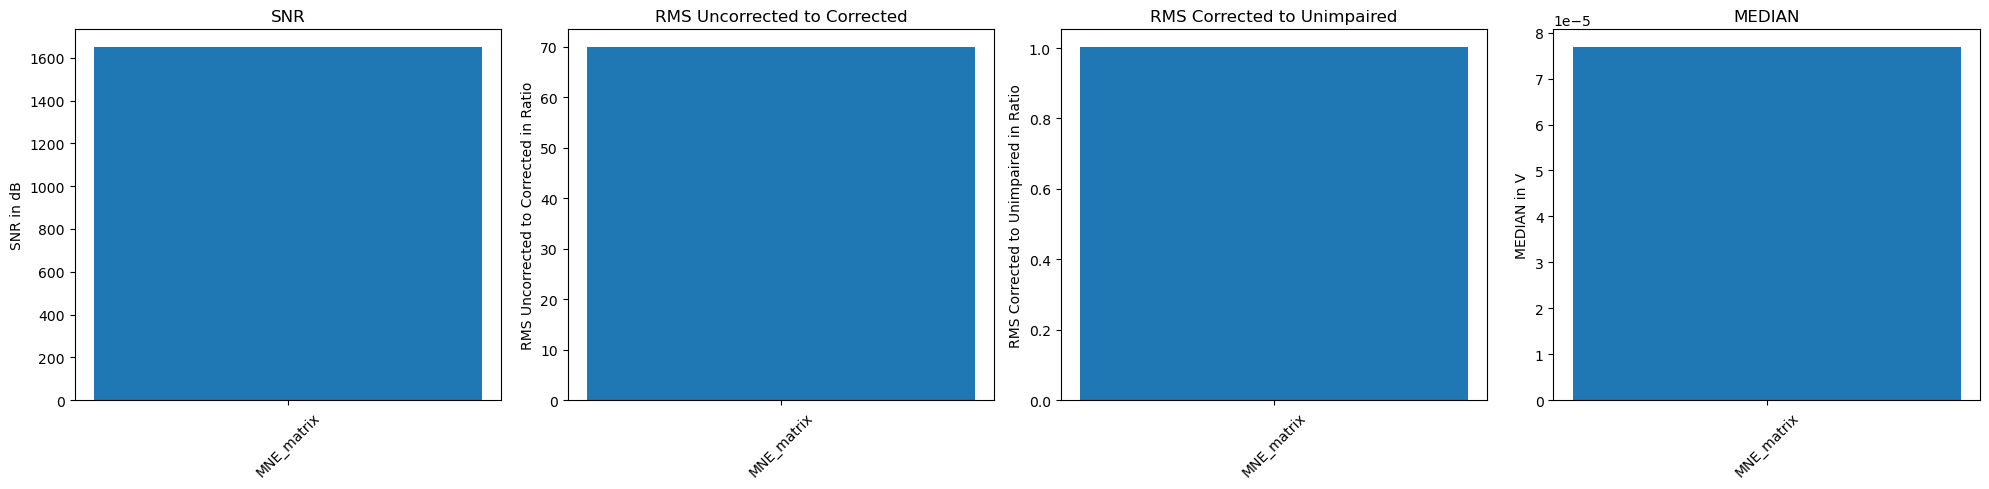

2024-03-27 17:09:49.952 | INFO     | __main__:<module>:5 - [{'Measure': 'SNR', 'Values': [1650.4157803060552], 'Unit': 'dB'}, {'Measure': 'RMS Uncorrected to Corrected', 'Values': [69.90883734887919], 'Unit': 'Ratio'}, {'Measure': 'RMS Corrected to Unimpaired', 'Values': [1.0030298635422166], 'Unit': 'Ratio'}, {'Measure': 'MEDIAN', 'Values': [7.688840449297015e-05], 'Unit': 'V'}]
2024-03-27 17:09:49.971 | INFO     | FACET.Frameworks.Analytics:export_EEG:90 - Exporting Channels: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5', 'EMG', 'ECG']


In [9]:
eeg_python = f.get_EEG()
f.add_to_evaluate(eeg_python, name="MNE_matrix") # Matrix will result in >1.0 RMS2 because of python mne inaccuracies

results = f.evaluate(plot=True,measures=["SNR", "RMS", "RMS2", "MEDIAN"])
logger.info(results)

f.export_EEG(path="./export", fmt="bids", event_id=event_id)

